## Расчет КПД термодинамического цикла

In [3]:
%pip install cache_magic matplotlib pandas numpy scipy

     |████████████████████████████████| 38.2 MB 3.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/mpanin/.pyenv/versions/3.10.1/bin/python /Users/mpanin/.pyenv/versions/3.10.1/lib/python3.10/site-packages/pip/_vendor/pep517/in_process/_in_process.py prepare_metadata_for_build_wheel /var/folders/hh/68jgbx_d0vg2b9jswqz9rntr0000gp/T/tmprhpm6b60
         cwd: /private/var/folders/hh/68jgbx_d0vg2b9jswqz9rntr0000gp/T/pip-install-__8gnqtg/scipy_c2aa00b7e9b4453ba5f26530bc3d3f7d
    Complete output (192 lines):
    setup.py:486: UserWarning: Unrecognized setuptools command ('dist_info --egg-base /private/var/folders/hh/68jgbx_d0vg2b9jswqz9rntr0000gp/T/pip-modern-metadata-w3e9kwjh'), proceeding with generating Cython sources and expanding templates
      warnings.warn("Unrecognized setuptools command ('{}'), proceeding with "
  

In [18]:
import cache_magic

In [34]:
import test as wsp
import matplotlib.pyplot as pl
import numpy as np
from coursache import tex_exp, print_latex

# P_f = 1088538.1638538  # 11.1 кгс/см² https://fis.bobrodobro.ru/8395
P_f = 980665.01248092  # 10 кгс/см² из https://ru.wikipedia.org/wiki/%D0%9A-1000-60/1500

# h
T_h = 220 + 273
# P_h = wsp.wspPST(T_h)
P_h = 5.9 * 10 ** 6
%cache S_h = wsp.wspSSWT(T_h)
%cache H_h = wsp.wspHSWT(T_h)

# b
P_b = P_h
%cache T_b = wsp.wspTSP(P_b)
%cache S_b = wsp.wspSSWT(T_b)
%cache H_b = wsp.wspHSWT(T_b)

# c
P_c = P_b
T_c = T_b
%cache S_c = wsp.wspSSST(T_c)
%cache H_c = wsp.wspHSST(T_c)

# d
P_d = P_f
%cache T_d = wsp.wspTSP(P_d)
S_d = S_c
%cache H_d = wsp.wspHPS(P_d, S_d)
%cache x_d = wsp.wspXPS(P_d, S_d)

# f
T_f = 250 + 273
%cache S_f = wsp.wspSPT(P_f, T_f)
%cache H_f = wsp.wspHPT(P_f, T_f)

# k
P_k = 4381 # 5883.9900748855 # конденсаторах типа К-22550. из https://leg.co.ua/arhiv/generaciya/ekspluatacionnye-rezhimy-vodo-vodyanyh-energeticheskih-reaktorov-33.html старое значение
x_k = x_d
%cache T_k = wsp.wspTSP(P_k) - 2
S_k = S_f
%cache H_k = wsp.wspHPS(P_k, S_k)


# e
T_e = T_d
P_e = P_d
%cache S_e = wsp.wspSSST(T_e)
%cache H_e = wsp.wspHSST(T_e)


# k'
P_k1 = P_k
T_k1 = T_k
%cache S_k1 = wsp.wspSSWT(T_k1)
%cache H_k1 = wsp.wspHSWT(T_k1)

# a
P_a = P_b
T_a = T_k
%cache S_a = wsp.wspSPT(P_a, T_a)
%cache H_a = wsp.wspHPS(P_a, S_a)

# g
T_g = T_d
P_g = P_d
%cache S_g = wsp.wspSSWT(T_g)
%cache H_g = wsp.wspHSWT(T_g)

n = 7
Q_el = 1000 * 10 ** 6 # Вт

import tabulate
from IPython.display import Latex, Math
display(tabulate.tabulate(
    {"Точка": ['h', 'b', 'c', 'd', 'e', 'f', 'k', 'k`', 'a', 'g'],
     "P":     np.array([P_h, P_b, P_c, P_d, P_e, P_f, P_k, P_k1, P_a, P_g]) * 10 ** -6,
     "T":     np.array([T_h, T_b, T_c, T_d, T_e, T_f, T_k, T_k1, T_a, T_g]) - 273,
     "S":     np.array([S_h, S_b, S_c, S_d, S_e, S_f, S_k, S_k1, S_a, S_g]),
     "H":     np.array([H_h, H_b, H_c, H_d, H_e, H_f, H_k, H_k1, H_a, H_g]) * 10 ** -3},
    tablefmt="html", headers="keys"))
Math(f"x_d = {tex_exp(x_d)}")

Loading cached value for variable 'S_h'. Time since caching: 1 day, 16:54:43.660739
Loading cached value for variable 'H_h'. Time since caching: 1 day, 16:52:02.698213
Loading cached value for variable 'T_b'. Time since caching: 1 day, 16:52:02.690598
Loading cached value for variable 'S_b'. Time since caching: 1 day, 16:52:02.384331
Loading cached value for variable 'H_b'. Time since caching: 1 day, 16:52:02.372536
Loading cached value for variable 'S_c'. Time since caching: 1 day, 16:52:02.340449
Loading cached value for variable 'H_c'. Time since caching: 1 day, 16:52:02.316737
Loading cached value for variable 'T_d'. Time since caching: 1 day, 16:52:02.298981
Loading cached value for variable 'H_d'. Time since caching: 1 day, 16:52:02.277249
Loading cached value for variable 'x_d'. Time since caching: 1 day, 16:52:02.269485
Loading cached value for variable 'S_f'. Time since caching: 1 day, 16:52:02.257014
Loading cached value for variable 'H_f'. Time since caching: 1 day, 16:52:02

Точка,P,T,S,H
h,5.9,220,2516.43,942.948
b,5.9,274.642,3017.38,1208.09
c,5.9,274.642,5898.01,2785.64
d,0.980665,179.189,5898.01,2462.69
e,0.980665,179.189,6591.71,2776.38
f,0.980665,250,6936.05,2943.61
k,0.004381,28.6935,6936.05,2099.52
k`,0.004381,28.6935,416.66,119.656
a,5.9,28.6935,414.931,125.046
g,0.980665,179.189,2130.22,758.945


<IPython.core.display.Math object>

In [3]:
iS_h

NameError: name 'iS_h' is not defined

In [ ]:
wsp.wspTSP(P_k) - 2 - 273

In [48]:
tex_table = fr"""
\begin{{table}}[H]
	\caption{{Значения параметров TS-диаграммы}}
	\begin{{center}}
        \begin{{tabular}}{{|c|c|c|c|c|}}
        \toprule
         Точка & P, МПа & T, $^\circ C$ & S, Дж/(кг $\cdot$ К) & h, кДж/кг \\ 
         \midrule
         \hline
          h & {P_h * 10 ** (-6):.01f} & {T_h -273} &  {S_h:.02f} & {H_h:.02f}\\ 
         \hline
          b & {P_b * 10 ** (-6):.01f} & {T_b - 273:.01f} & {S_b:.02f} & {H_b} \\ 
         \hline
          c & {P_c} & {T_c} & {S_c} & {H_c}\\ 
         \hline
          d & {P_d} & {T_d} & {S_d} & {H_d} \\ 
         \hline
          e & {P_e} & {T_e} & {S_e} & {H_e} \\ 
         \hline
          f & {P_f} & {T_f}  & {S_f} & {H_e} \\ 
         \hline
          k & {P_k} & {T_k} & {S_k} & {H_k} \\ 
         \hline
          k′ & {P_k1} & {T_k1} & {S_k1} & {H_k1} \\ 
         \hline
          a & {P_a} & {T_a} & {S_a} & {H_a} \\ 
         \hline
          g & {P_g} & {T_g} &  {S_g} & {H_g} \\ 
         \bottomrule
		\end{{tabular}}
		\label{{tabular:coeffs}}
	\end{{center}}
\end{{table}}
"""
Latex(tex_table)

<IPython.core.display.Latex object>

In [47]:
eta_t0 = 1 - ((T_k * (S_f - S_a) * x_d) / 
          # -------------------------------------------------
            ((H_c - H_g) + x_d * ((H_g - H_a) + (H_f - H_e))))

eta_t0_formulas = r"""
1 - 
\frac{T_{k} ⋅ \left( s_{f} - s_{a} \right) ⋅ x_{d}}
{\left( h_{c} - h_{g} \right) +x_{d}\left( \left( h_{g} - h_{a} \right) + \left( h_{f} - h_{e} \right) \right)}
"""

eta_t0_nums = fr"""
1 - 
\frac{{{tex_exp(T_k)} ⋅ \left( {tex_exp(S_f)} - {tex_exp(S_a)} \right) ⋅ {tex_exp(x_d)}}}
{{\left( {tex_exp(H_c)} - {tex_exp(H_g)} \right) + {tex_exp(x_d)} \left( \left( {tex_exp(H_g)} - {tex_exp(H_a)} \right) + \left( {tex_exp(H_f)} - {tex_exp(H_e)} \right) \right)}}
"""

final_code = fr"\begin{{align}} \eta_{{t0}}=&{eta_t0_formulas}=\\=&{eta_t0_nums}=\\=&{tex_exp(eta_t0)}\end{{align}}"

print(final_code)
display(Math(final_code))


\begin{align} \eta_{t0}=&
1 - 
\frac{T_{k} ⋅ \left( s_{f} - s_{a} \right) ⋅ x_{d}}
{\left( h_{c} - h_{g} \right) +x_{d}\left( \left( h_{g} - h_{a} \right) + \left( h_{f} - h_{e} \right) \right)}
=\\=&
1 - 
\frac{3.017 \cdot 10^{ 2 } ⋅ \left( 6.936 \cdot 10^{ 3 } - 4.149 \cdot 10^{ 2 } \right) ⋅ 8.445 \cdot 10^{ -01 }}
{\left( 2.786 \cdot 10^{ 6 } - 7.589 \cdot 10^{ 5 } \right) + 8.445 \cdot 10^{ -01 } \left( \left( 7.589 \cdot 10^{ 5 } - 1.250 \cdot 10^{ 5 } \right) + \left( 2.944 \cdot 10^{ 6 } - 2.776 \cdot 10^{ 6 } \right) \right)}
=\\=&3.854 \cdot 10^{ -01 }\end{align}


<IPython.core.display.Math object>

In [46]:
eta_t_infty = 1 - ((T_k * (S_f - S_g) * (S_c - S_h)) /
                # ------------------------------------------------------
                 ((H_c - H_h) * (S_e - S_g) + (H_f - H_e) * (S_c - S_h)))

eta_t_infty_formula = r"""
1 -
\frac{T_{k} ⋅ \left( s_{f} - s_{g} \right) \left( s_{c} - s_{h} \right)}
{\left(h_{c} - h_{h}\right) ⋅ \left( s_{e} - s_{g} \right) + \left( h_{f} - h_{e} \right) ⋅ \left( s_{c} - s_{h} \right)}
"""

eta_t_infty_nums = fr"""
1 -
\frac{{{tex_exp(T_k)} ⋅ \left( {tex_exp(S_f)} - {tex_exp(S_g)} \right) \left( {tex_exp(S_c)} - {tex_exp(S_h)} \right)}}
{{\left({tex_exp(H_c)}) - {tex_exp(H_h)}\right) ⋅ \left( {tex_exp(S_e)} - {tex_exp(S_g)} \right) + \left( {tex_exp(H_f)} - {tex_exp(H_e)} \right) ⋅ \left( {tex_exp(S_c)} - {tex_exp(S_h)} \right)}}
"""

final_code = fr"\begin{{align}}η_{{t∞}}&={eta_t_infty_formula}=\\&={eta_t_infty_nums}=\\&={tex_exp(eta_t_infty)}\end{{align}}"
print(final_code)

Math(final_code)

\begin{align}η_{t∞}&=
1 -
\frac{T_{k} ⋅ \left( s_{f} - s_{g} \right) \left( s_{c} - s_{h} \right)}
{\left(h_{c} - h_{h}\right) ⋅ \left( s_{e} - s_{g} \right) + \left( h_{f} - h_{e} \right) ⋅ \left( s_{c} - s_{h} \right)}
=\\&=
1 -
\frac{3.017 \cdot 10^{ 2 } ⋅ \left( 6.936 \cdot 10^{ 3 } - 2.130 \cdot 10^{ 3 } \right) \left( 5.898 \cdot 10^{ 3 } - 2.516 \cdot 10^{ 3 } \right)}
{\left(2.786 \cdot 10^{ 6 }) - 9.429 \cdot 10^{ 5 }\right) ⋅ \left( 6.592 \cdot 10^{ 3 } - 2.130 \cdot 10^{ 3 } \right) + \left( 2.944 \cdot 10^{ 6 } - 2.776 \cdot 10^{ 6 } \right) ⋅ \left( 5.898 \cdot 10^{ 3 } - 2.516 \cdot 10^{ 3 } \right)}
=\\&=4.420 \cdot 10^{ -01 }\end{align}


<IPython.core.display.Math object>

In [45]:
eta_tn = eta_t0 + (eta_t_infty - eta_t0) * n / (n + 1)

eta_tn_formula = r"""
η_{tn} = η_{t0} + \left( η_{t∞} - η_{t0} \right) ⋅ \frac{n}{n+1}
"""

eta_tn_nums = fr"""
{tex_exp(eta_t0)} + \left( {tex_exp(eta_t_infty)} - {tex_exp(eta_t0)} \right) \cdot \frac{{{n}}}{{{n + 1}}}
"""

final_code = fr"{eta_tn_formula}={eta_tn_nums}={tex_exp(eta_tn)}"
print(final_code)

Math(final_code)


η_{tn} = η_{t0} + \left( η_{t∞} - η_{t0} \right) ⋅ \frac{n}{n+1}
=
3.854 \cdot 10^{ -01 } + \left( 4.420 \cdot 10^{ -01 } - 3.854 \cdot 10^{ -01 } \right) \cdot \frac{7}{8}
=4.349 \cdot 10^{ -01 }


<IPython.core.display.Math object>

In [49]:
eta_brutto = eta_tn * 0.85 * 0.98 * 0.98 * 0.97

eta_brutto_formula = r"""
\eta_{\text{брутто}} = \eta^7 \cdot \eta^{\text{вн}} \cdot \eta_{\text{ос}} \cdot \eta_{\text{эг}} \cdot \eta_{\text{мех}} = 0.335
"""

eta_brutto_nums = fr"{tex_exp(eta_tn)} \cdot 0.85 \cdot 0.98 \cdot 0.98 \cdot 0.97"
final_code=fr"{eta_brutto_formula}={eta_brutto_nums}={tex_exp(eta_brutto)}"
print(final_code)
Math(final_code)


\eta_{\text{брутто}} = \eta^7 \cdot \eta^{\text{вн}} \cdot \eta_{\text{ос}} \cdot \eta_{\text{эг}} \cdot \eta_{\text{мех}} = 0.335
=4.349 \cdot 10^{ -01 } \cdot 0.85 \cdot 0.98 \cdot 0.98 \cdot 0.97=3.444 \cdot 10^{ -01 }


<IPython.core.display.Math object>

In [50]:
Q_tep = Q_el / eta_brutto

final_code = fr"Q_{{\text{{теп}}}} = \frac{{Q_{{\text{{эл}}}}}}{{\eta_{{\text{{брутто}}}}}}=\frac{{ {tex_exp(Q_el)} }} {{ {tex_exp(eta_brutto)} }} = {tex_exp(Q_tep * 10 ** -6)} \text{{МВт}}"
Q_tep

print(final_code)
Math(final_code)

Q_{\text{теп}} = \frac{Q_{\text{эл}}}{\eta_{\text{брутто}}}=\frac{ 1.000 \cdot 10^{ 9 } } { 3.444 \cdot 10^{ -01 } } = 2.904 \cdot 10^{ 3 } \text{МВт}


<IPython.core.display.Math object>

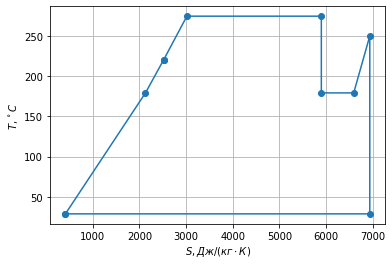

In [51]:
pl.plot([S_h, S_b, S_c, S_d, S_e, S_f, S_k, S_k1, S_a, S_g, S_h],
        np.array([T_h, T_b, T_c, T_d, T_e, T_f, T_k, T_k1, T_a, T_g, T_h]) - 273, '-o')
pl.grid()
pl.xlabel(r"$S, Дж/ (кг \cdot К)$")
pl.ylabel(r"$T,^\circ C$")
pl.savefig("TS_raw.svg")

## Расчет изменения теплового потока в наиболее нагруженном канале

In [52]:
K_r = 1.25
K_z = 1.5
N_tvs = 163
N_tvel = 317
H_az = 3.5 
q_max = Q_tep  * K_r * K_z / ( N_tvs * N_tvel * H_az )
q_max * 10 ** 4

q_max_formula = r"""
q_{max} = \frac {Q_{\text{теп}}K_r K_z}{N_{\text{ТВС}}N_{\text{твэл}}H_{\text{аз}}}  
"""

q_max_nums = fr"""
\frac 
{{ {tex_exp(Q_tep)} \cdot {K_r} \cdot {K_z}  }}
{{ {N_tvs} \cdot {N_tvel} \cdot {H_az} }}
"""

final_code = fr"{q_max_formula}={q_max_nums}={tex_exp(q_max / 100) } \frac {{\text{{Вт}}}} {{\text{{см}}}}"
print(final_code)
Math(final_code)


q_{max} = \frac {Q_{\text{теп}}K_r K_z}{N_{\text{ТВС}}N_{\text{твэл}}H_{\text{аз}}}  
=
\frac 
{ 2.904 \cdot 10^{ 9 } \cdot 1.25 \cdot 1.5  }
{ 163 \cdot 317 \cdot 3.5 }
=3.010 \cdot 10^{ 2 } \frac {\text{Вт}} {\text{см}}


<IPython.core.display.Math object>

## Распределение температуры теплоносителя по высоте 

In [53]:
P_az = 15.7 * 10 ** 6
T_az_vh = 287 + 273
T_az_vih = 320 + 273
%cache H_vh = wsp.wspHPT(P_az, T_az_vh)
%cache H_vih = wsp.wspHPT(P_az, T_az_vih)


G_tvs = (
            Q_tep           /
  # --------------------------
    ( (H_vih - H_vh) * N_tvs )
)

G_tvs_formula = r"""
G_{\text{ТВС}} = \frac {Q_{\text{теп}}} {(h_{\text{вых}} - h_{\text{вх}})N_{\text{ТВС}}}
"""

G_tvs_nums = fr"""
\frac {{ {tex_exp(Q_tep)} }} {{ ( { tex_exp(H_vih) } - { tex_exp(H_vh) }) \cdot {N_tvs} }} = {tex_exp(G_tvs)} \ \frac {{\text{{кг}}}}{{\text{{c}}}}
"""

final_code = f"{G_tvs_formula}={G_tvs_nums}"

print(final_code)
Math(final_code)


Loading cached value for variable 'H_vh'. Time since caching: 1 day, 16:36:39.893032
Loading cached value for variable 'H_vih'. Time since caching: 1 day, 16:36:39.558794

G_{\text{ТВС}} = \frac {Q_{\text{теп}}} {(h_{\text{вых}} - h_{\text{вх}})N_{\text{ТВС}}}
=
\frac { 2.904 \cdot 10^{ 9 } } { ( 1.452 \cdot 10^{ 6 } - 1.268 \cdot 10^{ 6 }) \cdot 163 } = 9.685 \cdot 10^{ 1 } \ \frac {\text{кг}}{\text{c}}



<IPython.core.display.Math object>

In [54]:
G_reak = (
            Q_tep           /
  # --------------------------
    ( (H_vih - H_vh) )
)

G_reak_formula = r"""
G_{\text{реак}} = \frac {Q_{\text{теп}}} {(h_{\text{вых}} - h_{\text{вх}})}
"""

G_reak_nums = fr"""
\frac {{ {tex_exp(Q_tep)} }} {{ ( { tex_exp(H_vih) } - { tex_exp(H_vh) }) }} = {tex_exp(G_reak)} \ \frac {{\text{{кг}}}}{{\text{{c}}}}
"""

final_code = f"{G_reak_formula}={G_reak_nums}"

print(final_code)
Math(final_code)


G_{\text{реак}} = \frac {Q_{\text{теп}}} {(h_{\text{вых}} - h_{\text{вх}})}
=
\frac { 2.904 \cdot 10^{ 9 } } { ( 1.452 \cdot 10^{ 6 } - 1.268 \cdot 10^{ 6 }) } = 1.579 \cdot 10^{ 4 } \ \frac {\text{кг}}{\text{c}}



<IPython.core.display.Math object>

In [55]:
C_p = (
      (H_vih - H_vh)  /
  # --------------------
    (T_az_vih - T_az_vh)
)

C_p_formula = r"""
C_p = \frac {h_{\text{вых}} - h_{\text{вх}}} {T_{\text{вых}} - T_{\text{вх}}}
"""

C_p_nums = fr"""
C_p = \frac {{ {tex_exp(H_vih)} - {tex_exp(H_vh)} }} {{ {tex_exp(T_az_vih)} - {tex_exp(T_az_vh)} }} = {tex_exp(C_p)} \ \frac{{ \text{{Дж}}}} {{ \text{{кг}} \cdot \text{{К}} }}
"""

final_code = f"{C_p_formula}={C_p_nums}"

print(final_code)
Math(final_code)


C_p = \frac {h_{\text{вых}} - h_{\text{вх}}} {T_{\text{вых}} - T_{\text{вх}}}
=
C_p = \frac { 1.452 \cdot 10^{ 6 } - 1.268 \cdot 10^{ 6 } } { 5.930 \cdot 10^{ 2 } - 5.600 \cdot 10^{ 2 } } = 5.574 \cdot 10^{ 3 } \ \frac{ \text{Дж}} { \text{кг} \cdot \text{К} }



<IPython.core.display.Math object>

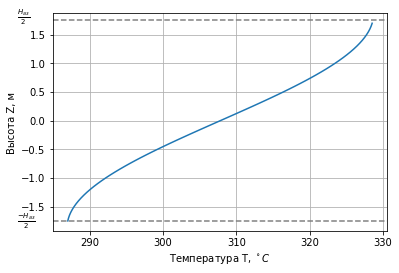

макс температура 328.5390975578629
запас до кипения 17.260902442137137


In [56]:
from math import pi, sin
H_eff = 3.715

def T(z): 
    return T_az_vh + (
        N_tvs * N_tvel * q_max * H_eff / (G_reak * C_p * pi) 
        * ( np.sin( pi * z / H_eff) + np.sin( pi * H_az / 2 / H_eff))
    )

Dz = np.arange(-H_az / 2 , H_az / 2, 0.05)

Et = T(Dz) - 273
pl.plot(Et, Dz)
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")

pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
pl.axhline(H_az / 2, linestyle='--', color="grey")

pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
pl.axhline( - H_az / 2, linestyle='--', color="grey")

pl.savefig("Ttep_.png", dpi=200)
pl.show()

print(f"макс температура {Et.max()}")
print(f"запас до кипения {345.8 - Et.max()}")

## Расчет распроеделения температуры внешней стенки оболочки по высоте

In [57]:
a = 234 * 10 ** -3
delta_chehol = 1.5 * 10 ** -3
d_tv = 9.1 * 10 ** -3
D_nk = 12.6 * 10 ** -3
N_nk = 12
D_ck = 10.3 * 10 ** -3
S_proh = (
    np.sqrt(3)/2 * (a - 2 * delta_chehol) ** 2 
    - N_tvel * pi * d_tv ** 2 / 4
    - N_nk * pi * D_nk ** 2 / 4
    - D_ck ** 2 * pi / 4
)

S_proh_formula = r"""
S_{\text{прох}} =& \sqrt{3}/2(a - 2 \cdot \delta_{\text{чехла}})^2 - N_{\text{твэл}} \frac {\pi d^2_{\text{тв}}} {4} - N_{\text{н.к.}} \frac {\pi D_{\text{н.к}}^2} {4} - \frac {D_{\text{ц.к}}^2\pi}{4}
"""

S_proh_nums = fr"""
\sqrt{{3}}/2({tex_exp(a)} - 2 \cdot {delta_chehol})^2 - {tex_exp(N_tvel)} \frac {{ \pi ({tex_exp(d_tv)})^2 }} {{4}} - {tex_exp(N_nk)} \frac {{ \pi ({tex_exp(D_nk)}))^2}} {{4}} - \frac {{ ({tex_exp(D_ck)})^2\pi }} {{4}} =\\=& {tex_exp(S_proh * 10 ** 6 )} \text{{мм}}^2
"""

final_code = fr"\begin{{align*}}{S_proh_formula}=&\\=&{S_proh_nums}\end{{align*}}"
print(final_code)
Math(final_code)

\begin{align*}
S_{\text{прох}} =& \sqrt{3}/2(a - 2 \cdot \delta_{\text{чехла}})^2 - N_{\text{твэл}} \frac {\pi d^2_{\text{тв}}} {4} - N_{\text{н.к.}} \frac {\pi D_{\text{н.к}}^2} {4} - \frac {D_{\text{ц.к}}^2\pi}{4}
=&\\=&
\sqrt{3}/2(2.340 \cdot 10^{ -01 } - 2 \cdot 0.0015)^2 - 3.170 \cdot 10^{ 2 } \frac { \pi (9.100 \cdot 10^{ -03 })^2 } {4} - 1.200 \cdot 10^{ 1 } \frac { \pi (1.260 \cdot 10^{ -02 }))^2} {4} - \frac { (1.030 \cdot 10^{ -02 })^2\pi } {4} =\\=& 2.402 \cdot 10^{ 4 } \text{мм}^2
\end{align*}


<IPython.core.display.Math object>

In [58]:
П = (
    (2 * (a - 2 * delta_chehol) * np.sqrt(3))
    + N_tvel * pi * d_tv
    + N_nk * pi * D_nk
    + pi * D_ck
)

П_formula = r"""
\Pi=& (2(a-2\delta_{\text{чехла}})\sqrt{3}) - N_{\text {твэл }} \pi d_{\text {тв }}+N_{\text {н.к }} \pi D_{\text {н.к }}+\pi D_{\text {ц.к}}
"""

П_nums = fr"""
(2( \cdot {tex_exp(a)}-2 \cdot {tex_exp(delta_chehol)}) \cdot \sqrt{{3}}) - {tex_exp(N_tvel)} \cdot \pi \cdot {tex_exp(d_tv)} + {tex_exp(N_nk)} \cdot \pi \cdot {tex_exp(D_nk)} + \pi \cdot {tex_exp(D_ck)}= {tex_exp(П * 10 ** 3)} \text{{мм}}
"""

final_code = fr"\begin{{align*}}{П_formula}=&\\={П_nums}\end{{align*}}"
print(final_code)
Math(final_code)

\begin{align*}
\Pi=& (2(a-2\delta_{\text{чехла}})\sqrt{3}) - N_{\text {твэл }} \pi d_{\text {тв }}+N_{\text {н.к }} \pi D_{\text {н.к }}+\pi D_{\text {ц.к}}
=&\\=
(2( \cdot 2.340 \cdot 10^{ -01 }-2 \cdot 1.500 \cdot 10^{ -03 }) \cdot \sqrt{3}) - 3.170 \cdot 10^{ 2 } \cdot \pi \cdot 9.100 \cdot 10^{ -03 } + 1.200 \cdot 10^{ 1 } \cdot \pi \cdot 1.260 \cdot 10^{ -02 } + \pi \cdot 1.030 \cdot 10^{ -02 }= 1.037 \cdot 10^{ 4 } \text{мм}
\end{align*}


<IPython.core.display.Math object>

In [59]:
d_g = 4 * S_proh / П

d_g_formula = r"""
d_{\text{Г}} = \frac {4 S_{\text{прох}}}{\text{П}}
"""

d_g_nums = fr"""
\frac {{4 \cdot {tex_exp(S_proh)}}} {{{tex_exp(П)}}} = {tex_exp(d_g)}
"""

final_code = fr"{d_g_formula}={d_g_nums} \text{{мм}}"
print(final_code)
Math(final_code)


d_{\text{Г}} = \frac {4 S_{\text{прох}}}{\text{П}}
=
\frac {4 \cdot 2.402 \cdot 10^{ -02 }} {1.037 \cdot 10^{ 1 }} = 9.263 \cdot 10^{ -03 }
 \text{мм}


<IPython.core.display.Math object>

In [60]:
mu = 8.721 * 10 ** -5
lambda_ = 0.5536
Pr = 0.8729

Re_petukhov = (
    ( G_reak * d_g )    / 
   # --------------------
    ( N_tvs * S_proh * mu )
)

Re_petukhov
tex_exp(Re_petukhov)

'4.283 \\cdot 10^{ 5 }'

In [61]:
xi = (1.82 * np.log10(Re_petukhov) - 1.64) ** -2
xi

0.0134898337003546

In [62]:
k = 1 + 900 / Re_petukhov

Nu_petukhov = (
            ( xi / 8 * Re_petukhov * Pr )  /
    # ------------------------------------------------
      (k + 12.7 * (Pr ** (2 / 3) - 1) * np.sqrt(xi / 8))
)

Nu_petukhov_formula = r"""
\mathrm{Nu}=&\frac{\frac{\xi}{8} \cdot \mathrm{Re} \cdot \operatorname{Pr}}{k+12.7 \cdot\left(\operatorname{Pr}^{\frac{2}{3}}-1\right) \cdot \sqrt{\frac{\xi}{8}}}
"""

Nu_petukhov_nums = fr"""
\frac{{ 
    \frac{{{tex_exp(xi)}}}{{8}} \cdot {tex_exp(Re_petukhov)} \cdot {tex_exp(Pr)} 
}}
{{ 
    1 + \frac{{900}}{{{tex_exp(Re_petukhov)}}} + 12.7 \cdot\left(({tex_exp(Pr)})^{{\frac{{2}}{{3}}}}-1\right) \cdot \sqrt{{\frac{{{tex_exp(xi)}}}{{8}}}} 
}} = {tex_exp(Nu_petukhov)} 
"""
    
    
final_code = fr"\begin{{align*}}{Nu_petukhov_formula}=\\=&{Nu_petukhov_nums}\end{{align*}}"

print(final_code)
Math(final_code)

\begin{align*}
\mathrm{Nu}=&\frac{\frac{\xi}{8} \cdot \mathrm{Re} \cdot \operatorname{Pr}}{k+12.7 \cdot\left(\operatorname{Pr}^{\frac{2}{3}}-1\right) \cdot \sqrt{\frac{\xi}{8}}}
=\\=&
\frac{ 
    \frac{1.349 \cdot 10^{ -02 }}{8} \cdot 4.283 \cdot 10^{ 5 } \cdot 8.729 \cdot 10^{ -01 } 
}
{ 
    1 + \frac{900}{4.283 \cdot 10^{ 5 }} + 12.7 \cdot\left((8.729 \cdot 10^{ -01 })^{\frac{2}{3}}-1\right) \cdot \sqrt{\frac{1.349 \cdot 10^{ -02 }}{8}} 
} = 6.589 \cdot 10^{ 2 } 
\end{align*}


<IPython.core.display.Math object>

In [63]:
alpha_1 = Nu_petukhov * lambda_ / d_g

final_code = fr"\alpha_1 = \frac {{Nu \cdot \lambda}} {{d_\text{{г}}}} = \frac {{{tex_exp(Nu_petukhov)} \cdot {tex_exp(lambda_)}}}{{{tex_exp(d_g)}}} = {tex_exp(alpha_1)} \frac {{\text{{Вт}}}}{{\text{{м}}^2\cdot\mathrm{{K}}}}"
print(final_code)
Math(final_code)

\alpha_1 = \frac {Nu \cdot \lambda} {d_\text{г}} = \frac {6.589 \cdot 10^{ 2 } \cdot 5.536 \cdot 10^{ -01 }}{9.263 \cdot 10^{ -03 }} = 3.938 \cdot 10^{ 4 } \frac {\text{Вт}}{\text{м}^2\cdot\mathrm{K}}


<IPython.core.display.Math object>

In [64]:
Nu_dittus = 0.023 * Re_petukhov ** 0.8 * Pr ** 0.4
print(Nu_dittus)


alpha_2 = Nu_dittus * lambda_ / d_g

final_code = fr"\alpha_2 = \frac {{Nu \cdot \lambda}} {{d_\text{{г}}}} = \frac {{{tex_exp(Nu_dittus)} \cdot {tex_exp(lambda_)}}}{{{tex_exp(d_g)}}} = {tex_exp(alpha_2)} \frac {{\text{{Вт}}}}{{\text{{м}}^2\cdot\mathrm{{K}}}}"
print(final_code)
Math(final_code)

697.5124069562332
\alpha_2 = \frac {Nu \cdot \lambda} {d_\text{г}} = \frac {6.975 \cdot 10^{ 2 } \cdot 5.536 \cdot 10^{ -01 }}{9.263 \cdot 10^{ -03 }} = 4.169 \cdot 10^{ 4 } \frac {\text{Вт}}{\text{м}^2\cdot\mathrm{K}}


<IPython.core.display.Math object>

In [65]:
Nu_mikheev = 0.021 * Re_petukhov ** 0.8 * Pr ** 0.43
print(Nu_mikheev)

alpha_3 = Nu_mikheev * lambda_ / d_g

final_code = fr"\alpha_3 = \frac {{Nu \cdot \lambda}} {{d_\text{{г}}}} = \frac {{{tex_exp(Nu_mikheev)} \cdot {tex_exp(lambda_)}}}{{{tex_exp(d_g)}}} = {tex_exp(alpha_3)} \frac {{\text{{Вт}}}}{{\text{{м}}^2\cdot\mathrm{{K}}}}"
print(final_code)
Math(final_code)

634.2673129055883
\alpha_3 = \frac {Nu \cdot \lambda} {d_\text{г}} = \frac {6.343 \cdot 10^{ 2 } \cdot 5.536 \cdot 10^{ -01 }}{9.263 \cdot 10^{ -03 }} = 3.791 \cdot 10^{ 4 } \frac {\text{Вт}}{\text{м}^2\cdot\mathrm{K}}


<IPython.core.display.Math object>

In [66]:
# S_m = 12.75 * 10 ** -3
alpha = (alpha_1 + alpha_2 + alpha_3) / 3
alpha
tex_exp(alpha)


'3.966 \\cdot 10^{ 4 }'

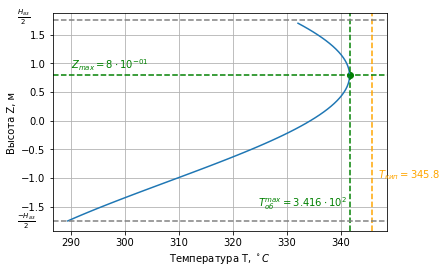

In [67]:
def T_ob(z): 
    return (
    T(z) + (q_max * np.cos(pi * z / H_eff)) / (pi * d_tv * alpha)
)

Dz = np.arange(-H_az / 2 , H_az / 2, 0.05)

Et = T_ob(Dz) - 273
pl.plot(Et, Dz)
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")

# pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
# pl.axhline(H_az / 2, linestyle='--', color="grey")

# pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
# pl.axhline( - H_az / 2, linestyle='--', color="grey")
# pl.show()

# print(f"макс температура {Et.max()}")
# print(f"запас до кипения {345.8 - Et.max()}")
pl.axvline(345.8, color="orange", linestyle="--")
pl.axvline(Et.max(), color="green", linestyle="--")
pl.text(Et.max() - 17, -1.5, fr"$T_{{об}}^{{max}}={tex_exp(Et.max())}$", color="green")
z_max = max(stats := {x: y for x, y in zip(Dz, Et)}, key=stats.get)
pl.axhline(z_max, linestyle="--", color="green")
pl.text(290, z_max + 0.1, fr"$Z_{{max}}={tex_exp(z_max, after_comma=0)}$", color="green")
pl.scatter(Et.max(), z_max, color="green")
pl.text(345.8 + 1, -1.0, "$T_{кип}=345.8$", color="orange")
pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
pl.axhline(H_az / 2, linestyle='--', color="grey")

pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
pl.axhline( - H_az / 2, linestyle='--', color="grey")
pl.savefig("Tob_.png", dpi=200)

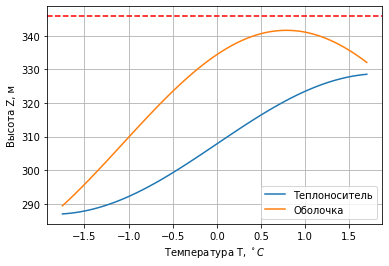

In [68]:
pl.plot(Dz, T(Dz) - 273, label="Теплоноситель")
pl.plot(Dz, T_ob(Dz) - 273, label="Оболочка")
pl.legend()
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")
pl.axhline(345.8, color="red", linestyle="--")
pl.savefig("Tobltep_.png", dpi=200)

## Расчет температуры топлива


## Расчет температуры топлива

In [77]:
lambda_gz = 0.35
lambda_ob = 20.1
lambda_top = 3.5
# delta_gz = 

In [78]:
delta_tvel = 0.65 * 10 ** -3
d_top = 7.53 * 10 ** -3
d_otv = 1.3 * 10 ** -3
delta_ob = 0.65 * 10 ** -3

Ri = (
    np.log(d_tv / (d_tv - 2 * delta_ob)) / (2 * pi * lambda_ob) 
    + np.log((d_tv - 2 * delta_ob) / d_top) / (2 * pi * lambda_gz) 
    + (0.5 - d_otv ** 2 / (d_top ** 2 - d_otv ** 2) * np.log(d_top / d_otv)) / (2 * pi * lambda_top)
)

Ri_formula = r"""
\sum R_i =& 
\frac {\ln \frac {d_{\text{тв}}}{d_{\text{тв}} - 2\delta_{об}}  }{2\pi\lambda_{\text{об}}}+\frac {\ln \frac {d_{\text{тв}} - 2\delta_{об}}{d_{\text{топ}}}  }{2\pi\lambda_{\text{г.з}}}+\frac {\frac 1 2 - \frac {d_{\text{отв}}^2} {d_{\text{топ}}^2 - d_{\text{отв}}^2}\ln \frac {d_{\text{топ}}}{d_{\text{отв}}}} {2 \pi \lambda_{\text{топ}}} =
"""

Ri_nums = fr"""
\frac {{\ln \frac{{ {tex_exp(d_tv)} }}{{ {tex_exp(d_tv)} - 2 \cdot {tex_exp(delta_ob)}}} }} {{2\cdot \pi \cdot {tex_exp(lambda_ob)}}}

+ \frac {{\ln \frac {{{tex_exp(d_tv)} - 2 \cdot {tex_exp(delta_ob)}}}{{{tex_exp(d_top)}}} }} {{2 \pi \cdot {tex_exp(lambda_gz)}}}

+ \frac {{ 0.5 - \frac{{ ({tex_exp(d_otv)})^2 }}{{ ({tex_exp(d_top)})^2 - ({tex_exp(d_otv)})^2 }} \ln \frac {{ {tex_exp(d_top)} }}{{ {tex_exp(d_otv)} }} }} {{2 \pi \cdot {tex_exp(lambda_top)} }}
"""
final_code = fr"\begin{{align*}}{Ri_formula}=\\=&{Ri_nums}=\\=&{tex_exp(Ri)} \frac {{\text{{м}} \cdot K}}{{\text{{Вт}}}}\end{{align*}}"
print(final_code)
Math(final_code)

\begin{align*}
\sum R_i =& 
\frac {\ln \frac {d_{\text{тв}}}{d_{\text{тв}} - 2\delta_{об}}  }{2\pi\lambda_{\text{об}}}+\frac {\ln \frac {d_{\text{тв}} - 2\delta_{об}}{d_{\text{топ}}}  }{2\pi\lambda_{\text{г.з}}}+\frac {\frac 1 2 - \frac {d_{\text{отв}}^2} {d_{\text{топ}}^2 - d_{\text{отв}}^2}\ln \frac {d_{\text{топ}}}{d_{\text{отв}}}} {2 \pi \lambda_{\text{топ}}} =
=\\=&
\frac {\ln \frac{ 9.100 \cdot 10^{ -03 } }{ 9.100 \cdot 10^{ -03 } - 2 \cdot 6.500 \cdot 10^{ -04 }} } {2\cdot \pi \cdot 2.010 \cdot 10^{ 1 }}

+ \frac {\ln \frac {9.100 \cdot 10^{ -03 } - 2 \cdot 6.500 \cdot 10^{ -04 }}{7.530 \cdot 10^{ -03 }} } {2 \pi \cdot 3.500 \cdot 10^{ -01 }}

+ \frac { 0.5 - \frac{ (1.300 \cdot 10^{ -03 })^2 }{ (7.530 \cdot 10^{ -03 })^2 - (1.300 \cdot 10^{ -03 })^2 } \ln \frac { 7.530 \cdot 10^{ -03 } }{ 1.300 \cdot 10^{ -03 } } } {2 \pi \cdot 3.500  }
=\\=&3.752 \cdot 10^{ -02 } \frac {\text{м} \cdot K}{\text{Вт}}\end{align*}


<IPython.core.display.Math object>

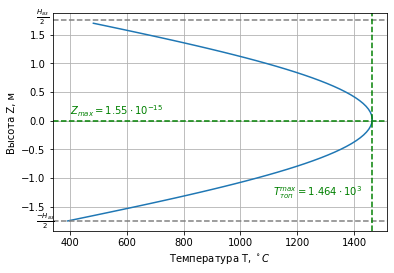

In [79]:
def T_top(z): 
    return (
    T_ob(z) + Ri * q_max * np.cos(pi * z / H_eff)
)

Dz = np.arange(-H_az / 2 , H_az / 2, 0.05)

Et = T_top(Dz) - 273
pl.plot(Et, Dz)
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")

# pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
# pl.axhline(H_az / 2, linestyle='--', color="grey")

# pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
# pl.axhline( - H_az / 2, linestyle='--', color="grey")
# pl.show()

# print(f"макс температура {Et.max()}")
# print(f"запас до кипения {345.8 - Et.max()}")
# pl.axvline(Et.max(), color="green", linestyle="--")
# pl.text(Et.max() - 17, -1.5, fr"$T_{{об}}^{{max}}={tex_exp(Et.max())}$", color="green")
# z_max = max(stats := {x: y for x, y in zip(Dz, Et)}, key=stats.get)
# pl.axhline(z_max, linestyle="--", color="green")
# pl.text(290, z_max + 0.1, fr"$Z_{{max}}={tex_exp(z_max, after_comma=0)}$", color="green")
# pl.scatter(Et.max(), z_max, color="green")
# pl.text(345.8 + 1, -1.0, "$T_{кип}=345.8$", color="orange")
pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
pl.axhline(H_az / 2, linestyle='--', color="grey")

pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
pl.axhline( - H_az / 2, linestyle='--', color="grey")
pl.axvline(Et.max(), color="green", linestyle="--")
pl.text(Et.max() - 350, -1.3, f"$T^{{max}}_{{топ}}={tex_exp(Et.max())}$", color="green")
z_max = max(stats := {x: y for x, y in zip(Dz, Et)}, key=stats.get)
pl.axhline(z_max, linestyle="--", color="green")
pl.text(400, z_max + 0.1, fr"$Z_{{max}}={tex_exp(z_max, after_comma=2)}$", color="green")
pl.savefig("Ttop_.png", dpi=200)

In [80]:
z_max

1.5543122344752192e-15

## Определение перепадов давления и необходимой мощности насосов на прокачку

In [81]:
rho_vih = 680.8
rho_vh = 752.1
rho_sr = (rho_vh + rho_vih) / 2
w = G_reak / rho_sr / S_proh / N_tvs

final_code = (
r"w = \frac{G_{\text{реак}}}{\rho_{\text{ср}} \cdot S_{\text{прох}} \cdot N_{\text{ТВС}}}"
fr"= \frac {{{tex_exp(G_reak)}}} {{{tex_exp(rho_sr)} \cdot {tex_exp(S_proh)} \cdot {tex_exp(N_tvs)}}} = {tex_exp(w)}"
r"\ \text{м} /\text{c}"
)

print(final_code)
Math(final_code)

w = \frac{G_{\text{реак}}}{\rho_{\text{ср}} \cdot S_{\text{прох}} \cdot N_{\text{ТВС}}}= \frac {1.579 \cdot 10^{ 4 }} {7.165 \cdot 10^{ 2 } \cdot 2.402 \cdot 10^{ -02 } \cdot 1.630 \cdot 10^{ 2 }} = 5.629 \ \text{м} /\text{c}


<IPython.core.display.Math object>

In [82]:
# w = 5.6
rho_vih = 680.8
rho_vh = 752.1
rho_sr = (rho_vh + rho_vih) / 2
w = G_tvs / rho_sr / S_proh
Delta_P_tr = xi * H_az / d_g * w ** 2 / 2 * rho_sr
Delta_P_tr_formula = r"""
\Delta P_{\text{тр}}=\xi_{\text{тр}}\cdot\frac{H_{\text{аз}}}{d_{\text{г}}}\cdot \frac {w^2}{2}\rho
"""

Delta_P_tr_nums = fr"""
{tex_exp(xi)} \frac {{{tex_exp(H_az)}}} {{{tex_exp(d_g)}}} \cdot \frac {{({tex_exp(w)})^2}} {{2}} \cdot {tex_exp(rho_sr)}
"""

final_code = fr"""
{Delta_P_tr_formula}={Delta_P_tr_nums}={tex_exp(Delta_P_tr)} \text{{Па}}
"""
print(final_code)
Math(final_code)



\Delta P_{\text{тр}}=\xi_{\text{тр}}\cdot\frac{H_{\text{аз}}}{d_{\text{г}}}\cdot \frac {w^2}{2}\rho
=
1.349 \cdot 10^{ -02 } \frac {3.500 } {9.263 \cdot 10^{ -03 }} \cdot \frac {(5.629 )^2} {2} \cdot 7.165 \cdot 10^{ 2 }
=5.785 \cdot 10^{ 4 } \text{Па}



<IPython.core.display.Math object>

In [83]:
Delta_P_usk = ( G_reak  / (N_tvs * S_proh)) ** 2 * (1 / rho_vih - 1 / rho_vh)
Delta_P_usk

Delta_P_usk_formula = r"""
\Delta P_{\mathrm{уск}} = \left( \frac{G_{\text{реак}}}{N_{\mathrm{TBC}} \cdot S_{\mathrm{npox}}} \right)^{2} \cdot \left(\frac{1}{\rho_{\mathrm{вых}}} - \frac{1}{\rho_{\mathrm{вx}}} \right)

"""

Delta_P_usk_nums = fr"""
\left( \frac{{ {tex_exp(G_reak)} }} {{ {tex_exp(N_tvs)} \cdot {tex_exp(S_proh)} }} \right)^2 \cdot \left(\frac 1 {{ {tex_exp(rho_vih)} }} - \frac 1  {{ {tex_exp(rho_vh)} }} \right) =  {tex_exp(Delta_P_usk)} \text{{Па}}
"""

final_code = fr"\begin{{multline}}{Delta_P_usk_formula}= \\ = {Delta_P_usk_nums}\end{{multline}}"
print(final_code)
Math(final_code)

\begin{multline}
\Delta P_{\mathrm{уск}} = \left( \frac{G_{\text{реак}}}{N_{\mathrm{TBC}} \cdot S_{\mathrm{npox}}} \right)^{2} \cdot \left(\frac{1}{\rho_{\mathrm{вых}}} - \frac{1}{\rho_{\mathrm{вx}}} \right)

= \\ = 
\left( \frac{ 1.579 \cdot 10^{ 4 } } { 1.630 \cdot 10^{ 2 } \cdot 2.402 \cdot 10^{ -02 } } \right)^2 \cdot \left(\frac 1 { 6.808 \cdot 10^{ 2 } } - \frac 1  { 7.521 \cdot 10^{ 2 } } \right) =  2.265 \cdot 10^{ 3 } \text{Па}
\end{multline}


<IPython.core.display.Math object>

In [84]:
Delta_P_niv = rho_sr * 9.80665*H_az

Delta_P_niv_formula = r"""
\Delta P_{\text{нив}} = \rho_{\text{ср}} \cdot g \cdot H_{\text{аз}}
"""

Delta_P_niv_nums = fr"""
{tex_exp(rho_sr)} \cdot 9.807 \cdot {tex_exp(H_az)} = {tex_exp(Delta_P_niv)} \text{{Па}}
"""

final_code = f"{Delta_P_niv_formula}={Delta_P_niv_nums}"
print(final_code)
Math(final_code)


\Delta P_{\text{нив}} = \rho_{\text{ср}} \cdot g \cdot H_{\text{аз}}
=
7.165 \cdot 10^{ 2 } \cdot 9.807 \cdot 3.500  = 2.459 \cdot 10^{ 4 } \text{Па}



<IPython.core.display.Math object>

In [86]:
Delta_P_mest = (G_reak / (N_tvs * S_proh)) ** 2 / 2 * (2.6 / rho_vh + 13 * 0.45 / rho_sr + 0.26 / rho_vih)
Delta_P_mest_nums = fr"""
\Delta P_{{\text{{мест}}}} = \frac{{ \left( \frac{{{tex_exp(G_reak)}}} {{{N_tvs} \cdot {tex_exp(S_proh)} }}  \right)^2 }} {{2}} \cdot \left( \frac{{ 2.6 }}{{ {tex_exp(rho_vh)} }} +\frac{{ 13 \cdot 0.45 }}{{{tex_exp(rho_sr)}}}+\frac{{0.26}} {{ {tex_exp(rho_vih)} }} \right) = {tex_exp(Delta_P_mest)} \text{{Па}}
"""
print(Delta_P_mest_nums)
Math(Delta_P_mest_nums)


\Delta P_{\text{мест}} = \frac{ \left( \frac{1.579 \cdot 10^{ 4 }} {163 \cdot 2.402 \cdot 10^{ -02 } }  \right)^2 } {2} \cdot \left( \frac{ 2.6 }{ 7.521 \cdot 10^{ 2 } } +\frac{ 13 \cdot 0.45 }{7.165 \cdot 10^{ 2 }}+\frac{0.26} { 6.808 \cdot 10^{ 2 } } \right) = 9.761 \cdot 10^{ 4 } \text{Па}



<IPython.core.display.Math object>

In [87]:
Delta_P = Delta_P_tr + Delta_P_usk + Delta_P_niv + Delta_P_mest
Delta_P
tex_exp(Delta_P)

'1.823 \\cdot 10^{ 5 }'

In [88]:
N_pr = N_tvs * Delta_P * G_tvs / ( 0.8 * rho_vh)
N_pr
N_pr_nums = fr"""
N_{{\text{{пр}}}} = {N_tvs} \cdot \frac {{{tex_exp(Delta_P)} \cdot {tex_exp(G_tvs)}}} {{0.8 \cdot {tex_exp(rho_vh)}}} = {tex_exp(N_pr)} \text{{Вт}}
"""

print(N_pr_nums)
Math(N_pr_nums)


N_{\text{пр}} = 163 \cdot \frac {1.823 \cdot 10^{ 5 } \cdot 9.685 \cdot 10^{ 1 }} {0.8 \cdot 7.521 \cdot 10^{ 2 }} = 4.783 \cdot 10^{ 6 } \text{Вт}



<IPython.core.display.Math object>

In [89]:
eta_netto = (Q_el - N_pr) / Q_tep
eta_netto_nums = fr"\eta^{{\prime}} = \frac{{{tex_exp(Q_el)} - {tex_exp(N_pr)}}}{{{tex_exp(Q_tep)}}}={{{tex_exp(eta_netto)}}}"

print(eta_netto_nums)
Math(eta_netto_nums)

\eta^{\prime} = \frac{1.000 \cdot 10^{ 9 } - 4.783 \cdot 10^{ 6 }}{2.904 \cdot 10^{ 9 }}={3.427 \cdot 10^{ -01 }}


<IPython.core.display.Math object>

## ТРЕТОН

### Подготовка $K_r$

[1.25, 1.248, 1.22, 1.17, 1.1, 1.02, 0.95, 0.88, 0.8]


<IPython.core.display.Math object>

press f to savej
not saved


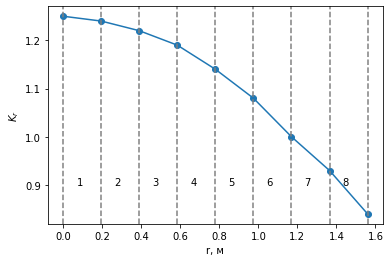

In [90]:
import matplotlib.pyplot as pl
from coursache import print_latex
import numpy as np
from pathlib import Path
# from scipy.special import j0

R_az = 1.56
delta_eff = 10 * 10 ** -2

def split_r_by_n(r, n) -> np.ndarray:
    return np.array([ (r / n) * i for i in range(n+1) ])


grid = split_r_by_n(R_az, 8)

# def K_z_ref(r):
    # return - r ** 2 + 1.25
 #    return j0(2.4048 / (R_az + delta_eff) * r) + 0.25

def Podgon(r): 
    return - 0.17369 * r ** 2 + 1.25



# ref_plot = (grid) , # K_z_ref(grid))

# K_zs = (lambda r: - r ** 2 + 1)(grid) # np.array([1, 0.9, 0.8, 0.6, 0.5, 0.3, 0.25, 0.2, 0.1 ])

K_zs = [1.25, 1.248, 1.22, 1.17 , 1.1,
       1.02, 0.95, 0.88, 0.8]

K_rs = np.round(Podgon(grid), decimals=2)
K_rs = np.array([1.25, 1.24, 1.22, 1.19, 1.14, 1.08, 1, 0.93, 0.84])
print(repr(K_zs))
# K_zs = K_z_ref(grid)

Tvses = np.array([0, 1, 6, 12, 18, 24, 30, 36, 36])

Tvses_total = sum(K_zs[i] * Tvses[i] for i in range(8 + 1))
print_latex(fr"$\sum K_r^iN^i={Tvses_total}$")

K_r_podgon = (grid, K_rs)


# pl.plot(*ref_plot)
# pl.scatter(*ref_plot)

pl.scatter(*K_r_podgon)
pl.plot(*K_r_podgon)

for n, i in enumerate(grid, start=1):
    pl.axvline(i, linestyle='--', color="gray")
    if n <= 8:
        pl.text(i + R_az / 8 / 2 - 0.03, 0.9, f"{n}")
pl.xlabel('r, м')
pl.ylabel('$K_r$')
K_rs = K_rs[1:]
save = input("press f to save"); pl.savefig("fig/Kr.png", dpi=1000) if save == "f" else print("not saved")

In [91]:
grid

array([0.   , 0.195, 0.39 , 0.585, 0.78 , 0.975, 1.17 , 1.365, 1.56 ])

### Подготовка $K_z$

In [92]:
from math import pi as π
from math import cos
H_az = 3.5
Q_az = 2.904 * 10 ** 3 * 10 ** 6
split = 30
grid_z = [- H_az / 2 + H_az / split / 2 * (2 * n + 1) for n in range(30)]

def Kz(z):
    Kz = 1.5
    Heff = 3.715
    return Kz * cos (π * z / Heff)

K_zs = np.array(list(map(Kz, grid_z)))

press f to save9
not saved


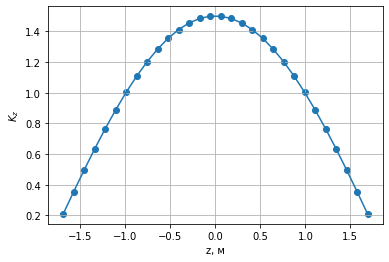

In [93]:
pl.plot(grid_z, K_zs)
pl.scatter(grid_z, K_zs)
pl.xlabel("z, м")
pl.ylabel("$K_z$")
pl.grid()
save = input("press f to save"); pl.savefig("fig/Kz.png", dpi=1000) if save == "f" else print("not saved")


Определим генерацию файла с тепловыделениями `Q6.txt`

In [97]:
import pandas as pd

#Q_txt = pd.read_csv("tools/TRETON/Q6.txt", sep=r"\s+", header=None)
#Q_txt.head()

r_split = [
    [82],  # 1 белый
    [68, 69, 83, 96, 95, 81],  # 2 фиолетовый
    [54, 55, 56, 70, 84, 97, 110, 109, 108, 94, 80, 67],
    [41, 42, 43, 44, 57, 71, 85, 98, 111, 123, 122, 121, 120, 107, 93, 79, 66, 53],
    [29, 30, 31, 32, 33, 45, 58, 72, 86, 99, 112, 124, 135, 134, 133, 132, 131, 119, 106, 92, 78, 65, 52, 40],
    [18, 19, 20, 21, 22, 23, 34, 46, 59, 73, 87, 100, 113, 125, 136, 146, 145, 144, 143, 142, 141, 130, 118, 105, 91, 77, 64, 51, 39, 28],
    [8, 9, 10, 11, 12, 13, 14, 24, 35, 47, 60, 74, 88, 101, 114, 126, 137, 147, 156, 155, 154, 153, 152, 151, 150, 140, 129, 117, 104, 90, 76, 63, 50, 38, 27, 17],
    [1, 2, 3, 4, 5, 6, 15, 25, 36, 48, 61, 75, 102, 115, 127, 138, 148, 157, 163, 162, 161, 160, 159, 158, 149, 139, 128, 116, 103, 89, 62, 49, 37, 26, 16, 7]
]

def Q_by_r(N=1, save=False, file: str | Path ="Q_my.txt"):
    Q_my = pd.DataFrame(np.zeros((163, 30)))
    for i in range(8):
        for j in r_split[i]:
            Q_my.iloc[j - 1] = N * K_rs[i] * Q_az / 163 / split * K_zs
    if save:
        Q_my.round(3).to_csv(file, sep= ' ', header=None, index=False)
    return Q_my

In [95]:
Q_nominal.round(3).to_csv("wow.txt", sep= ' ', header=None, index=False)

NameError: name 'Q_nominal' is not defined

Определим генерацию температур `T_IN.txt`

In [99]:
from itertools import chain

T_low = 284
T_normal = 287
az_quarts = {
    'I': [1, 2, 3, 7, 8, 9, 10, 16, 17, 18, 19, 20, 26, 27, 28, 29, 30, 31, 37, 38, 39, 40, 41, 42, 49, 50, 51, 52, 53, 55, 62, 63, 64, 65, 66, 67, 68, 77, 79],
    'II': [4, 5, 6, 11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 32, 33, 34, 35, 36, 43, 44, 45, 46, 47, 48, 56, 57, 58, 59, 60, 61, 69, 70, 71, 72, 73, 74, 75, 83, 85, 87, 88],
    'III': [76, 78, 80, 81, 89, 90, 91, 92, 93, 94, 95, 103, 104, 105, 106, 107, 108, 116, 117, 118, 119, 120, 121, 128, 129, 130, 131, 132, 139, 140, 141, 142, 143, 149, 150, 151, 152, 158, 159, 160],
    'IV': [84, 86, 96, 97, 98, 99, 100, 101, 102, 109, 110, 111, 112, 113, 114, 115, 122, 123, 124, 125, 126, 127, 133, 134, 135, 136, 137, 138, 144, 145, 146, 147, 148, 153, 154, 155, 156, 157, 161, 162, 163]
}
DISABLED_QUARTS = 'I', 'IV'
disabled_cells_i = set(chain.from_iterable(az_quarts[q] for q in DISABLED_QUARTS))


def T_for_quarts(disabled_quarts=[], save=False, file: str | Path ="T_IN.txt", t_low=T_low, t_normal=T_normal):
    DISABLED_QUARTS = disabled_quarts
    disabled_cells_i = set(chain.from_iterable(az_quarts[q] for q in DISABLED_QUARTS))
    Ts = pd.Series(np.full((163,), t_normal))
    for i in range(163):
        if i + 1 in disabled_cells_i:
            Ts[i] = t_low
    if save:
        Ts.to_csv(file, sep=" ", index=False, header=False)
    return Ts


### Номинальная мощность

**Запускаем третон руками**

In [100]:
TRETON_NOMINAL_FOLDER = Path("tools/TRETON-nominal")
COMMON_T_R_PLOT_ARGS = dict(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True)

In [106]:
Q_nominal

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
1,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
2,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
3,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
4,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
159,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
160,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
161,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942


In [48]:
Q_nominal = Q_by_r(N=1, save=True, file=TRETON_NOMINAL_FOLDER / "Q6.txt")
T_IN_nominal = T_for_quarts(save=True, file=TRETON_NOMINAL_FOLDER / "T_IN.txt")

NameError: name 'TRETON_NOMINAL_FOLDER' is not defined

**Графики**

In [101]:
import math
T_teplonos_nominal = pd.read_csv(TRETON_NOMINAL_FOLDER / "t_tepl.dat", 
                                 sep=r"\s+", header=None)\
                                    .loc[:, 2:].set_axis(grid_z, axis=1)

Температура теплоносителя усрелненная по всем кассетам в сравнении с теплофизом

Отклонение максимальной температуры теплоносителя от теплофиза составляет -0.0842066267327084 %
среднее квадратичное отклонение  1.838261757930391


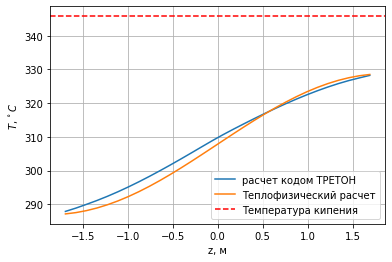

In [102]:
T_teplonos_nominal.mean().plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="расчет кодом ТРЕТОН")
pl.plot(grid_z, T(np.array(grid_z)) - 273, label="Теплофизический расчет")
pl.axhline(345.8, linestyle="--", label="Температура кипения", c='r')

# pl.text(H_az / 2, 280, r"$\frac{H_{аз}}{2}$")
# pl.axvline(H_az / 2, linestyle='--', color="grey")

# pl.text(- H_az / 2  - 0.07, 280, r"$\frac{ - H_{аз}}{2}$")
# pl.axvline( - H_az / 2, linestyle='--', color="grey")
# pl.legend()



Delta_T_teplonos_nominal_reference = T_teplonos_nominal.mean() * 100 / (T(np.array(grid_z)) - 273) - 100
print("Отклонение максимальной температуры теплоносителя "
      f"от теплофиза составляет {Delta_T_teplonos_nominal_reference[grid_z[-1]]} %")

# Pogr_Delta_T_teplonos_nominal_reference = np.sqrt(sum((T_teplonos_nominal.mean()[z] - (T(z) - 273)) ** 2 for z in grid_z) / len(grid_z) * (len(grid_
print("среднее квадратичное отклонение ", 
      np.sqrt(
           sum( (T_teplonos_nominal.mean() - T(np.array(grid_z)) + 273) ** 2 ) / 
          # --------------------------------------------------------------------
                                   len(grid_z)
      )
)
pl.legend()
pl.savefig("fig/treton_nominal_t_z.png", dpi=1000)
pl.show()

In [103]:
grid_z

[-1.6916666666666667,
 -1.575,
 -1.4583333333333333,
 -1.3416666666666668,
 -1.225,
 -1.1083333333333334,
 -0.9916666666666667,
 -0.875,
 -0.7583333333333333,
 -0.6416666666666666,
 -0.5249999999999999,
 -0.4083333333333332,
 -0.29166666666666674,
 -0.17500000000000004,
 -0.05833333333333335,
 0.05833333333333335,
 0.17500000000000004,
 0.2916666666666665,
 0.4083333333333332,
 0.5249999999999999,
 0.6416666666666666,
 0.7583333333333333,
 0.875,
 0.9916666666666667,
 1.1083333333333334,
 1.225,
 1.3416666666666668,
 1.4583333333333335,
 1.5750000000000002,
 1.6916666666666669]

<AxesSubplot:xlabel='z, м', ylabel='Превышение температуры, %'>

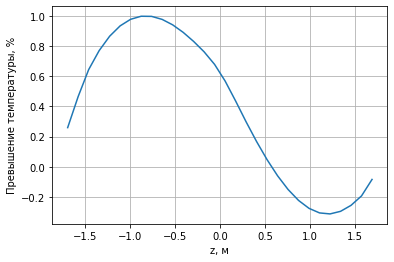

In [104]:
Delta_T_teplonos_nominal_reference.plot(xlabel="z, м", ylabel="Превышение температуры, %", grid=True)

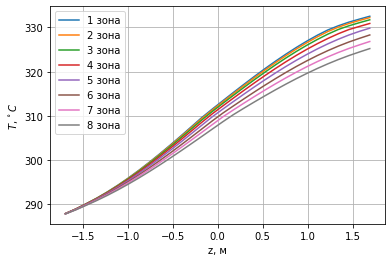

In [105]:
for r in range(8):
    T_teplonos_nominal.iloc[np.array(r_split[r]) - 1].mean().plot(label=f"{r + 1} зона", **COMMON_T_R_PLOT_ARGS)
pl.legend()
pl.savefig("fig/treton_nominal_t_z_by_r.png", dpi=1000)

Запас до кипения 13.954099999999983
Макс температура теплоносителя 332.5459


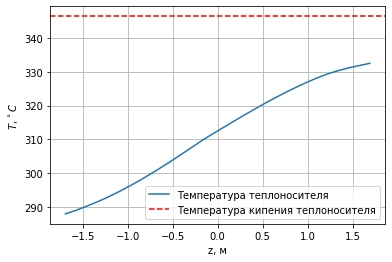

In [136]:
T_tepl_max = T_teplonos_nominal.iloc[T_teplonos_nominal.idxmax().values[-1]]
T_tepl_max.plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="Температура теплоносителя" )
pl.axhline(346.5, linestyle="--", label="Температура кипения теплоносителя", c='r')
pl.legend()
pl.savefig("fig/treton_nominal_t_z_max.png", dpi=1000)

T_tepl_boil = 346.5 # for 15.8 МПа
T_nominal_before_boiling = T_tepl_boil  - T_tepl_max.max()
print("Запас до кипения",  T_nominal_before_boiling)
print("Макс температура теплоносителя", T_tepl_max.max())

In [137]:
T_teplonos_nominal.iloc[T_teplonos_nominal.idxmax().values[-1]]

-1.691667    287.9086
-1.575000    288.9655
-1.458333    290.1614
-1.341667    291.4253
-1.225000    292.8184
-1.108333    294.3350
-0.991667    295.9668
-0.875000    297.7032
-0.758333    299.5339
-0.641667    301.4465
-0.525000    303.4289
-0.408333    305.4673
-0.291667    307.5491
-0.175000    309.6412
-0.058333    311.5574
 0.058333    313.4312
 0.175000    315.2919
 0.291667    317.1260
 0.408333    318.9218
 0.525000    320.6661
 0.641667    322.3483
 0.758333    323.9566
 0.875000    325.4818
 0.991667    326.9136
 1.108333    328.2475
 1.225000    329.4410
 1.341667    330.3862
 1.458333    331.2038
 1.575000    331.8858
 1.691667    332.5459
Name: 81, dtype: float64

Температура топлива в кассете с максимальной температурой по высоте

1087.36

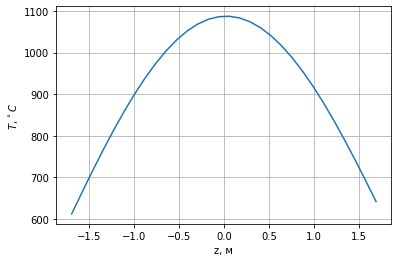

In [108]:
T_fuel_nominal = pd.read_csv(TRETON_NOMINAL_FOLDER / "t_fuel.dat", 
                             sep=r"\s+", header=None)\
                              .loc[:, 2:].set_axis(grid_z, axis=1)
T_fuel_max = T_fuel_nominal.iloc[T_fuel_nominal.idxmax().values[15]]
T_fuel_max.plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True)
# pl.plot(grid_z, T_top(np.array(grid_z)) - 273)
pl.savefig("fig/treton_nominal_t_fuel_max.png", dpi=1000)
T_fuel_max.max()

In [109]:
T_fuel_nominal.max(axis=0)

-1.691667     612.49
-1.575000     665.08
-1.458333     716.45
-1.341667     766.14
-1.225000     813.69
-1.108333     858.64
-0.991667     900.55
-0.875000     939.04
-0.758333     973.72
-0.641667    1004.27
-0.525000    1030.40
-0.408333    1051.85
-0.291667    1068.41
-0.175000    1079.90
-0.058333    1086.22
 0.058333    1087.36
 0.175000    1083.27
 0.291667    1074.01
 0.408333    1059.67
 0.525000    1040.39
 0.641667    1016.41
 0.758333     987.96
 0.875000     955.35
 0.991667     918.92
 1.108333     879.04
 1.225000     836.05
 1.341667     790.39
 1.458333     742.53
 1.575000     692.94
 1.691667     642.23
dtype: float64

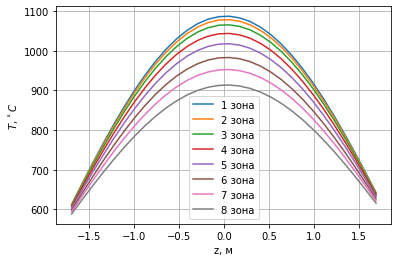

In [110]:
for r in range(8):
    T_fuel_nominal.iloc[np.array(r_split[r]) - 1].mean().plot(label=f"{r + 1} зона", **COMMON_T_R_PLOT_ARGS)
pl.legend()
pl.savefig("fig/treton_nominal_t_fuel_by_r.png", dpi=1000)

In [111]:
T_obl_naruj_nominal = pd.read_csv(TRETON_NOMINAL_FOLDER / "t_r_obl_naruj.dat",
                                 sep=r"\s+", header=None)\
                                    .loc[:, 2:].set_axis(grid_z, axis=1)
T_obl_vnutr_nominal = pd.read_csv(TRETON_NOMINAL_FOLDER / "t_r_obl_vnutr.dat",
                                 sep=r"\s+", header=None)\
                                    .loc[:, 2:].set_axis(grid_z, axis=1)

Запас до кипения 0.041200000000003456


346.4588

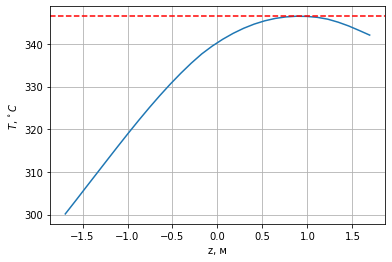

In [112]:
T_obl_naruj_max = T_obl_naruj_nominal.iloc[T_obl_naruj_nominal.idxmax().values[-1]]
T_obl_vnutr_max = T_obl_vnutr_nominal.iloc[T_obl_vnutr_nominal.idxmax().values[-1]]
T_obl_naruj_max.plot(grid=True, xlabel="z, м", ylabel="$T, ^\circ C$")
pl.axhline(346.5, linestyle='--', c='r')
print("Запас до кипения", 346.5 - T_obl_naruj_max.max())
pl.savefig("fig/treton_nominal_obl_naruj_max.png", dpi=1000)
T_obl_naruj_max.max()

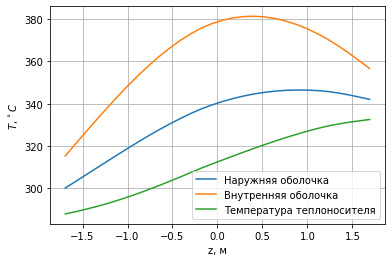

In [113]:
T_obl_naruj_max.plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="Наружняя оболочка")
T_obl_vnutr_max.plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="Внутренняя оболочка")
T_tepl_max.plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="Температура теплоносителя" )
pl.legend()
pl.savefig("fig/treton_nominal_obl_tepl_obsh.png")

In [114]:
T_obl_naruj_nominal

,-1.691667,-1.575000,-1.458333,-1.341667,-1.225000,-1.108333,-0.991667,-0.875000,-0.758333,-0.641667,...,0.641667,0.758333,0.875000,0.991667,1.108333,1.225000,1.341667,1.458333,1.575000,1.691667
0,299.0683,301.4061,303.7891,306.1448,308.4980,310.8431,313.1633,315.4414,317.6620,319.8097,...,334.9683,335.4108,335.7140,335.8809,335.9170,335.8272,335.6186,335.2984,334.8712,334.4088
1,299.0683,301.4060,303.7891,306.1448,308.4980,310.8432,313.1635,315.4417,317.6623,319.8102,...,334.9636,335.4055,335.7080,335.8745,335.9103,335.8202,335.6114,335.2909,334.8632,334.3997
2,299.0697,301.4078,303.7912,306.1471,308.5007,310.8460,313.1663,315.4444,317.6646,319.8118,...,334.9494,335.3897,335.6910,335.8564,335.8915,335.8012,335.5927,335.2732,334.8470,334.3861
3,299.0690,301.4070,303.7902,306.1461,308.4995,310.8447,313.1649,315.4429,317.6632,319.8106,...,334.9574,335.3988,335.7009,335.8669,335.9023,335.8119,335.6030,335.2826,334.8555,334.3935
4,299.0677,301.4055,303.7886,306.1444,308.4977,310.8430,313.1633,315.4415,317.6621,319.8097,...,334.9537,335.3943,335.6957,335.8612,335.8962,335.8059,335.5974,335.2779,334.8521,334.3918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,299.0707,301.4089,303.7923,306.1482,308.5016,310.8468,313.1669,315.4449,317.6651,319.8123,...,334.9573,335.3983,335.7000,335.8657,335.9007,335.8101,335.6011,335.2808,334.8538,334.3920
159,299.0705,301.4087,303.7921,306.1482,308.5017,310.8471,313.1675,315.4456,317.6660,319.8134,...,334.9522,335.3926,335.6939,335.8595,335.8946,335.8046,335.5964,335.2774,334.8521,334.3928
160,299.0699,301.4080,303.7913,306.1472,308.5006,310.8458,313.1660,315.4441,317.6645,319.8121,...,334.9595,335.4006,335.7021,335.8675,335.9020,335.8106,335.6005,335.2789,334.8505,334.3873
161,299.0696,301.4076,303.7909,306.1468,308.5001,310.8454,313.1655,315.4436,317.6640,319.8114,...,334.9620,335.4041,335.7070,335.8738,335.9099,335.8203,335.6119,335.2919,334.8648,334.4026


In [115]:
Rho_tepl = pd.read_csv(TRETON_NOMINAL_FOLDER / "ro_tepl.dat",
                       sep=r"\s+", header=None)
                                    #.loc[:, 2:].set_axis(grid_z, axis=1)
Rho_tepl.iloc[81]

0     722.8439
1     718.8220
2     714.7283
3     710.5990
4     706.4863
5     701.5231
6     696.2582
7     691.1079
8     686.0948
9     681.2565
10    676.6097
11    672.1881
12    668.0021
13    664.0807
14    660.4285
15    657.0658
16    654.0423
17    650.7743
18    647.4319
19    644.4374
20    641.4874
21      0.3615
22      0.2087
23    750.4872
24    748.7361
25    746.6868
26    743.9925
Name: 81, dtype: float64

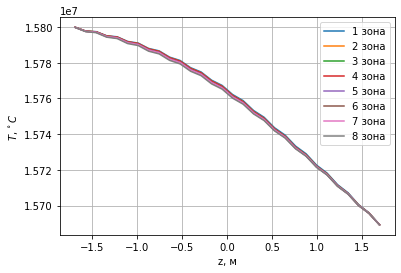

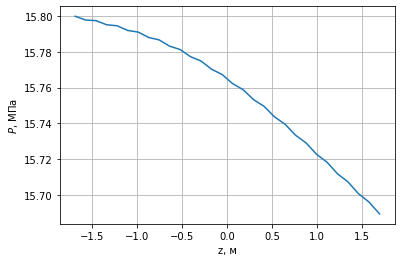

In [116]:
P_tepl = pd.read_csv(TRETON_NOMINAL_FOLDER / "p_tepl.dat",
                     sep=r"\s+", header=None)\
                                    .loc[:, 2:].set_axis(grid_z, axis=1)
for r in range(8):
   P_tepl.iloc[np.array(r_split[r]) - 1].mean().plot(label=f"{r + 1} зона", **COMMON_T_R_PLOT_ARGS)
pl.legend()
pl.show()
(P_tepl.iloc[81] * 10 ** -6 ).plot(xlabel="z, м", ylabel="$P$, МПа", grid=True)
pl.savefig("fig/p_nominal_max.png", dpi=1000)

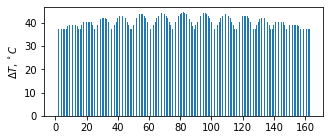

In [117]:
import matplotlib.pyplot as pl
fig, ax = pl.subplots(figsize=(5, 2))

# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(25)
    
podogrev = (T_teplonos_nominal[grid_z[-1]] - T_teplonos_nominal[grid_z[0]])
ax.bar(range(1, 164), podogrev, width=0.5, align='center')
pl.ylabel("$\Delta T, ^\circ C$")
pl.savefig("fig/podogrev_nominal.jpg")




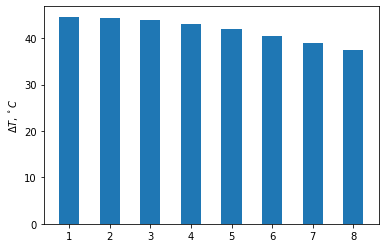

In [118]:

# import matplotlib.pyplot as pl
# fig, ax = pl.subplots(figsize=(25, 10))

# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(25)
    
podogrev_by_r = [podogrev.iloc[np.array(r_split[i]) - 1].mean() for i in range(8)]
pl.bar(range(1, 9), podogrev_by_r, width=0.5, align='center')
pl.ylabel("$\Delta T, ^\circ C$")
pl.savefig("fig/podogrev_nominal_by_r.png")

In [119]:
G_nominal = pd.read_csv(TRETON_NOMINAL_FOLDER / "G_out.dat",
                        sep=r"\s+", header=None)  \
                                    .loc[:, 2:]
# fig, ax = pl.subplots(figsize=(15, 5))

# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(25)
# ax.bar(range(1, 164), G_nominal, width=0.5, align='center')
# pl.ylabel("$\Delta T, ^\circ C$")
# pl.savefig("fig/g_nominal_out.jpg")

In [120]:
(16116.22 / 163) * G_nominal

,2
0,14.423127
1,14.422336
2,14.417590
3,14.409087
4,14.403155
...,...
158,14.442605
159,14.429752
160,14.426093
161,14.419568


In [121]:
Q_nominal = pd.read_csv(TRETON_NOMINAL_FOLDER / "Q.dat",
                        sep=r"\s+", header=None)  \
                                    .loc[:, 2:]
H_nominal = pd.read_csv(TRETON_NOMINAL_FOLDER / "h_tepl.dat",
                        sep=r"\s+", header=None)  \
                                    .loc[:, 2:]
Q_nominal.mean(axis=1) / (H_nominal[31] - H_nominal[2])

0      2338.373273
1      2338.866182
2      2340.167851
3      2339.559211
4      2339.873273
          ...     
158    2339.640707
159    2339.852623
160    2339.891750
161    2338.874869
162    2339.398409
Length: 163, dtype: float64

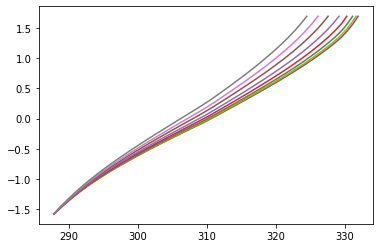

In [125]:
t_nominal = pd.read_csv("tools/TRETON-nominal/t_tepl.dat", sep=r"\s+", header=None)

# T_z_by_r = [nominal.iloc[np.array(r_split[i]) - 1].mean().values for i in range(8)]
# for i in range(8):
#     pl.plot(grid_z, T_z_by_r[i][1:-1], label=f"{i+1} radius")
# pl.legend()
# t_nominal.iloc[:, 1:]
T_z_by_r = [t_nominal.iloc[np.array(r_split[i]) - 1, 1:].mean().values for i in range(8)]
for i in range(8):
    pl.plot(T_z_by_r[i][1:-1], grid_z[1:], label=f"{i+1} radius")

In [126]:
# pl.plot([R_az / 8 / 2 * (2 * n ) for n in range(8)], list(map(np.mean, Q_z_by_r)))
pl.bar([R_az / 8 / 2 * (2 * n ) + R_az / 8 / 2 for n in range(8)], list(map(np.mean, Q_z_by_r)), width=R_az / 8)
for i in grid:
    pl.axvline(i, linestyle='--', color="gray")
pl.xlabel("r, м")
pl.ylabel("Q, Вт")

NameError: name 'Q_z_by_r' is not defined

### Повышенная мощность
**Запускаем третон руками**

In [138]:
TRETON_POVISH_FOLDER = Path("tools/TRETON-povish")

In [154]:
Q_povish = Q_by_r(N=1.15, save=True, file=TRETON_POVISH_FOLDER / "Q6.txt")
T_IN_povish = T_for_quarts(save=True, file=TRETON_POVISH_FOLDER / "T_IN.txt")

Запас до кипения 10.171699999999987
Макс температура теплоносителя 336.3283
Превышение максимальной температуры 3.7823999999999955
Превышение запаса до кипения 3.7823999999999955


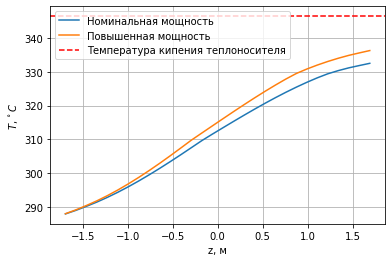

In [145]:
T_teplonos_povish = pd.read_csv(TRETON_POVISH_FOLDER / "t_tepl.dat", 
                                 sep=r"\s+", header=None).loc[:, 2:].set_axis(grid_z, axis=1)

T_tepl_povish_max = T_teplonos_povish.iloc[T_teplonos_povish.idxmax().values[-1]]

T_tepl_max.plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="Номинальная мощность" )
T_tepl_povish_max.plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="Повышенная мощность" )
pl.axhline(346.5, linestyle="--", label="Температура кипения теплоносителя", c='r')
pl.legend()


# pl.savefig("fig/treton_nominal_t_z_max.png", dpi=1000)
T_povish_before_boiling = T_tepl_boil - T_tepl_povish_max.max()
print("Запас до кипения", T_povish_before_boiling)
print("Макс температура теплоносителя", T_tepl_povish_max.max())
print("Превышение максимальной температуры", T_tepl_povish_max.max() - T_tepl_max.max())
print("Превышение запаса до кипения", T_nominal_before_boiling - T_povish_before_boiling)

In [ ]:
T_teplonos_nominal.max().plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="Номинальная мощность")
T_teplonos_povish = pd.read_csv(TRETON_POVISH_FOLDER / "t_tepl.dat", 
                                 sep=r"\s+", header=None)\
                                    .loc[:, 2:].set_axis(grid_z, axis=1)
T_teplonos_povish.max().plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="Повышенная мощность")
pl.axhline(345.8, linestyle="--", label="Температура кипения", c='r')
pl.legend()

In [ ]:
T_teplonos_nominal.max().plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="Номинальная мощность")
T_teplonos_povish = pd.read_csv(TRETON_POVISH_FOLDER / "t_tepl.dat", 
                                 sep=r"\s+", header=None)\
                                    .loc[:, 2:].set_axis(grid_z, axis=1)
T_teplonos_povish.max().plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True, label="Повышенная мощность")
pl.axhline(345.8, linestyle="--", label="Температура кипения", c='r')
pl.legend()

**Графики**

### 3 ГЦН
**Запускаем третон руками**

In [155]:
TRETON_ONE_GCN_FOLDER = Path("tools/TRETON-one-gcn/")

Q_one_gcn = Q_by_r(N=0.75, save=True, file=TRETON_ONE_GCN_FOLDER / "Q6.txt")
T_IN_one_gcn = T_for_quarts(disabled_quarts=['I'], save=True, file=TRETON_ONE_GCN_FOLDER / "T_IN.txt")

**Графики**

### 2 ГЦН
**Запускаем третон руками**


In [156]:
TRETON_TWO_GCN_FOLDER = Path("tools/TRETON-two-gcn/")

Q_two_gcn = Q_by_r(N=0.5, save=True, file=TRETON_TWO_GCN_FOLDER / "Q6.txt")
T_IN_two_gcn = T_for_quarts(disabled_quarts=['I', 'IV'], save=True, file=TRETON_TWO_GCN_FOLDER / "T_IN.txt")

**Графики**